In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")
np.random.seed(42)


In [15]:
class Population():
    def __init__(self, bag, adjacency_mat):
        self.bag = bag
        self.parents = []
        self.score = 0
        self.best = None
        self.adjacency_mat = adjacency_mat


def init_population(cities, adjacency_mat, n_population):
    return Population(np.asarray([np.random.permutation(cities) for _ in range(n_population)]), adjacency_mat)


def fitness(self, chromosome):
    return sum([self.adjacency_mat[chromosome[i], chromosome[i + 1]] for i in range(len(chromosome)-1)])

Population.fitness = fitness

#Returns vector of probabilities that chromosome i will be chosen
def evaluate(self):
    distances = np.asarray([self.fitness(chromosome) for chromosome in self.bag])
    self.score = np.min(distances)
    #Puts the smallest distance as best from bag/whole population
    self.best = self.bag[distances.tolist().index(self.score)]
    #Appends the best chromosome to list of parents
    self.parents.append(self.best)
    #If the element is the worst one, make sure it has no probability of getting chosen
    if False in (distances[0] == distances):
        distances = np.max(distances) - distances
    #Creates a probability by dividing each element with the sum of element, making the total probability 1
    return distances / np.sum(distances)
    
Population.evaluate = evaluate


def select(self, k):
    #Probability vector
    fit = self.evaluate()
    #Picks k amount of parents
    while len(self.parents) < k:
        #Picks random number from length of fit
        idx = np.random.randint(0, len(fit))
        #Makes sure that the fit scores that are higher have a higher chance of getting chosen
        #If index of fit is bigger than number 0-1 it gets picked as parent
        if fit[idx] > np.random.rand():
            self.parents.append(self.bag[idx])
    #Parent array
    self.parents = np.asarray(self.parents)

Population.select = select


def swap(chromosome):
    #Returns 2 elements from chromosome to swap
    a, b = np.random.choice(len(chromosome), 2)
    chromosome[a], chromosome[b] = (chromosome[b], chromosome[a])
    return chromosome

def crossover(self, p_cross):
    children = []
    count, size = self.parents.shape
    #Loops through the population
    for _ in range(len(self.bag)):
        #If number is bigger than pcross we put the c
        if np.random.rand() > p_cross:
            children.append(
                list(self.parents[np.random.randint(count, size=1)[0]])
            )
        else:
            #Chose two random parents to make the child
            parent1, parent2 = self.parents[
                np.random.randint(count, size=2), :
            ]
            #Slices elements of one parent, and fills it with the elements of the other parent
            #creates a list of two random integers in range size
            idx = np.random.choice(range(size), size=2, replace=False)
            #Picks the starting and ending index of the array to fill from first parent
            start, end = min(idx), max(idx)
            #Creates empty list of size size 
            child = [None] * size
            #Fills the child with the chromosomes of the first parent between index start and end
            for i in range(start, end + 1, 1):
                child[i] = parent1[i]
            pointer = 0
            for i in range(size):
                #Fills the child with the rest of the indeces from the second parent
                if child[i] is None:
                    while parent2[pointer] in child:
                        pointer += 1
                    child[i] = parent2[pointer]

            children.append(child)
    return children

Population.crossover = crossover


def mutate(self, p_cross, p_mut):
    next_bag = []
    #Crossover children
    children = self.crossover(p_cross)
    #Loop through the children, if the random number is smaller than the probability of mutation rate, the child is mutated
    for child in children:
        if np.random.rand() < p_mut:
            #Switches out the child in the list of childs
            next_bag.append(swap(child))
        else:
            #Keeps the old child
            next_bag.append(child)
    return next_bag
    
Population.mutate = mutate

def genetic_algorithm(cities, adjacency_mat, n_population, n_iter, selectivity=0.10, p_cross=0.5, p_mut=0.12, print_interval=100, return_history=False, verbose=False):
    pop = init_population(cities, adjacency_mat, n_population)
    best = pop.best
    score = float("inf")
    history = []
    for i in range(n_iter):
        if score <= 8000:
            print(f"Generation {i}: {score}")
            break
        #Selects a subset of population for picking parents
        pop.select(n_population * selectivity)
        #History for tracking progress
        history.append(pop.score)
        if verbose:
            print(f"Generation {i}: {pop.score}")
        elif i % print_interval == 0:
            print(f"Generation {i}: {pop.score}")
        #Set populations score to the best if it beats another population
        if pop.score < score:
            best = pop.best
            score = pop.score
        #mutates children
        children = pop.mutate(p_cross, p_mut)
        pop = Population(children, pop.adjacency_mat)
    if return_history:
        return best, history
    return best

def make_mat(coordinates):
    res = [[get_distance(city1, city2) for city2 in coordinates] for city1 in coordinates]
    return np.asarray(res)

def get_distance(city1, city2):
    return np.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)




In [16]:
child = [None] *4
print(child)

[None, None, None, None]


<class 'pandas.core.frame.DataFrame'>
Generation 0: 24729.711275632304


C:\Users\vp96\AppData\Local\Temp\ipykernel_37828\135240709.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('berlin52.tsp', skiprows = 6, delimiter=r'\s+', names = col_names, usecols=['x','y'], skipfooter=2) #! Seperates the columns by identifying the spaces


Generation 100: 14401.596272669061
Generation 200: 12240.969891802393
Generation 300: 10406.824469930503
Generation 400: 9186.302938722243
Generation 500: 9060.949756085018
Generation 600: 8715.73803118414
Generation 700: 8545.607355180357
Generation 800: 8185.741312366865
Generation 900: 8087.125337998147
Generation 978: 7982.558171853732


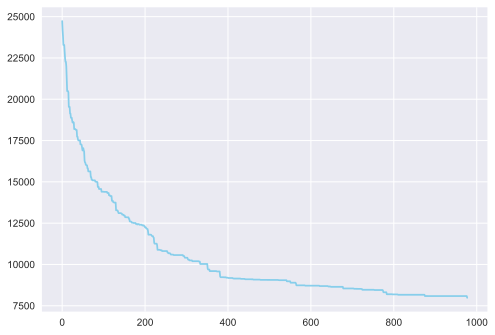

In [17]:
col_names = ['City Index', 'x', 'y']

df = pd.read_csv('berlin52.tsp', skiprows = 6, delimiter=r'\s+', names = col_names, usecols=['x','y'], skipfooter=2) #! Seperates the columns by identifying the spaces

print(type(df))

city_coordinates = df.to_numpy()

adjacency_mat = make_mat(city_coordinates)

cities = range(len(city_coordinates))

best, history = genetic_algorithm(cities, adjacency_mat, n_population=300, n_iter=1501, verbose=False, return_history=True)

plt.plot(range(len(history)), history, color="skyblue")
plt.show()


